In [53]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, roc_auc_score, ConfusionMatrixDisplay
# from sklearn.linear_model import SGDClassifier


submission = pd.read_csv('data/sample_submission.csv')

In [31]:
source = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [45]:
folds = 3

X = source.drop(columns=['id', 'target'])
y = source.target

p = []
estimator = LGBMClassifier(n_jobs=-1, random_state=11)
kf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=19)
for train, valid in kf.split(X, y):
    estimator.fit(X.loc[train], y[train])
    p.append((estimator.predict(X.loc[valid]), y[valid]))


In [57]:
fold = 0
roc_auc_score(p[fold][0], p[fold][1])

0.6987179487179488

In [51]:
fold = 2
f1_score(p[fold][0], p[fold][1])

0.7272727272727272

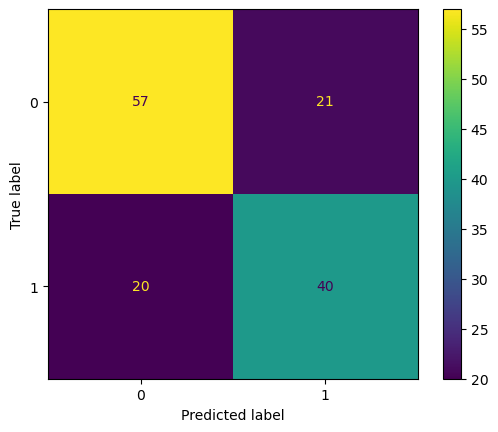

In [52]:
fold = 0
ConfusionMatrixDisplay.from_predictions(p[fold][0], p[fold][1]);